# Deep Fruits - Image Recognition

### General Modules

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import cv2
import os

## Load Training and Validation Data

In [3]:
# Data downloaded from:
# https://www.kaggle.com/moltean/fruits/data
# unziped and "fruits-360" folder placed on root (same folder as this notebook)

# Define paths to both training and validation data
train_path = 'fruits-360/Training/*'
valid_path = 'fruits-360/Validation/*'

In [4]:
def loadData(path):
    ''' Load the images and labels to raw numpy arrays
    Args: 
        path (str), path to folder to parse
        images (list), empty list where array of images will be stored
        labels (list), empty list where lables will be stored
    return:
        images (list, numpy array), contains the images loaded
        labels (list, numpy array), contains the labels for each image
    '''
    
    images = []
    labels = []
    
    # Count the unique labels in the set
    unique_labels = []
    
    for folder in glob.glob(path):
        label = folder.split('/')[-1]
        
        for file in glob.glob(os.path.join(folder, '*.jpg')):
            image = cv2.imread(file, cv2.IMREAD_COLOR)
            # imread loads an image from the specified file and returns it
            image = cv2.resize(image, (45, 45))
            # resize resizes the image to the specified size
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            # converts an input image from one color space to another
            
            images.append(image)
            labels.append(label)
        
        # Append to unique labels in the set
        unique_labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    print('%s has %s unique labels, as follows %s' %(path, len(unique_labels), unique_labels))
    print(' ')
    print('%s contains %s images and %s labels' %(path, len(images), len(labels)))
    
    return images, labels

In [5]:
# TRAINING Data labels and description
train_images, train_labels = loadData(train_path)

fruits-360/Training/* has 60 unique labels, as follows ['Training\\Apple Braeburn', 'Training\\Apple Golden 1', 'Training\\Apple Golden 2', 'Training\\Apple Golden 3', 'Training\\Apple Granny Smith', 'Training\\Apple Red 1', 'Training\\Apple Red 2', 'Training\\Apple Red 3', 'Training\\Apple Red Delicious', 'Training\\Apple Red Yellow', 'Training\\Apricot', 'Training\\Avocado', 'Training\\Avocado ripe', 'Training\\Banana', 'Training\\Banana Red', 'Training\\Cactus fruit', 'Training\\Carambula', 'Training\\Cherry', 'Training\\Clementine', 'Training\\Cocos', 'Training\\Dates', 'Training\\Granadilla', 'Training\\Grape Pink', 'Training\\Grape White', 'Training\\Grape White 2', 'Training\\Grapefruit Pink', 'Training\\Grapefruit White', 'Training\\Guava', 'Training\\Huckleberry', 'Training\\Kaki', 'Training\\Kiwi', 'Training\\Kumquats', 'Training\\Lemon', 'Training\\Lemon Meyer', 'Training\\Limes', 'Training\\Litchi', 'Training\\Mandarine', 'Training\\Mango', 'Training\\Maracuja', 'Training\\

In [6]:
# VALIDATION Data labels and description
valid_images, valid_labels = loadData(valid_path)

fruits-360/Validation/* has 60 unique labels, as follows ['Validation\\Apple Braeburn', 'Validation\\Apple Golden 1', 'Validation\\Apple Golden 2', 'Validation\\Apple Golden 3', 'Validation\\Apple Granny Smith', 'Validation\\Apple Red 1', 'Validation\\Apple Red 2', 'Validation\\Apple Red 3', 'Validation\\Apple Red Delicious', 'Validation\\Apple Red Yellow', 'Validation\\Apricot', 'Validation\\Avocado', 'Validation\\Avocado ripe', 'Validation\\Banana', 'Validation\\Banana Red', 'Validation\\Cactus fruit', 'Validation\\Carambula', 'Validation\\Cherry', 'Validation\\Clementine', 'Validation\\Cocos', 'Validation\\Dates', 'Validation\\Granadilla', 'Validation\\Grape Pink', 'Validation\\Grape White', 'Validation\\Grape White 2', 'Validation\\Grapefruit Pink', 'Validation\\Grapefruit White', 'Validation\\Guava', 'Validation\\Huckleberry', 'Validation\\Kaki', 'Validation\\Kiwi', 'Validation\\Kumquats', 'Validation\\Lemon', 'Validation\\Lemon Meyer', 'Validation\\Limes', 'Validation\\Litchi', '

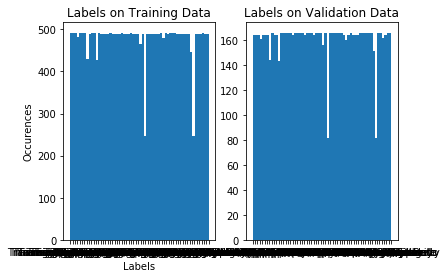

In [7]:
# Is the Data balanced?
plt.subplot(121)
plt.hist(train_labels, bins=60)
plt.title('Labels on Training Data')
plt.xlabel('Labels')
plt.ylabel('Occurences')
plt.subplot(122)
plt.hist(valid_labels, bins=60)
plt.title('Labels on Validation Data')
plt.show()

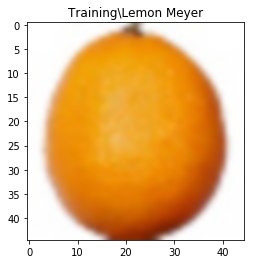

In [8]:
# Show a random TRAINING image and its label
rmd=np.random.randint(0,len(train_images))
plt.title(train_labels[rmd])
plt.imshow(np.asarray(train_images[rmd],dtype="uint8"),interpolation="bicubic")

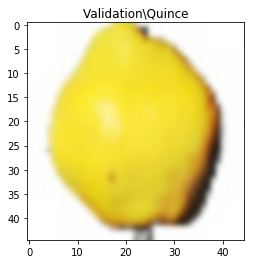

In [9]:
# Show a random VALIDATION image and its label
rmd=np.random.randint(0,len(valid_images))
plt.title(valid_labels[rmd])
plt.imshow(np.asarray(valid_images[rmd],dtype="uint8"),interpolation="bicubic")

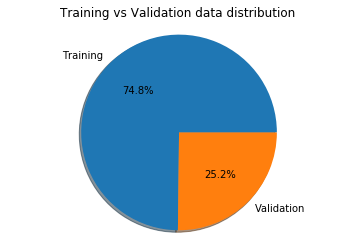

In [10]:
# Training and validation data distribution
labels = 'Training', 'Validation'
sizes = [len(train_images), len(valid_images)]

fig1, ax1 = plt.subplots()
plt.title('Training vs Validation data distribution')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Training and Validation Data Normalization

In [ ]:
#ToDo

### Convert to one hot
There are 60 different classes (labels) possible

In [47]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

In [57]:
train_labels[2000]

'Training\\Apple Granny Smith'

In [ ]:
# Need to first convert the list of string labels to an int for the label, i.e. from 0 to 59
# Something like results = list(map(int, results))? or a loop?

In [48]:
train_labels_onehot = convertToOneHot(train_labels, num_classes=59)

IndexError: arrays used as indices must be of integer (or boolean) type

## Define Network

### Network Modules

In [27]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\envs\dl_course\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Layers

In [50]:
# Variables
'Training input has %s, training labels has %s' %(train_images.shape, train_labels.shape)

'Training input has (28736, 45, 45, 3), training labels has (28736,)'

In [28]:
# Input shapes
inp_col = train_images.shape[1]
inp_row = train_images.shape[2]
inp_cha = 3
# Variables are train_images, train_labels and valid_images, valid_labels

In [29]:
'Input shape is %s cols by %s rows with %s channels' %(inp_col, inp_row, inp_cha)

'Input shape is 45 cols by 45 rows with 3 channels'

### Model 1: First run with a Fully Connected

In [53]:
# Image flattening for the FC network

train_flatten=np.zeros([len(train_images), 45*45*3])
for i in range(0, len(train_images)):
    train_flatten[i]=np.reshape(train_images[i], newshape=((45*45*3),))
    
valid_flatten=np.zeros([len(valid_images), 45*45*3])
for i in range(0, len(valid_images)):
    valid_flatten[i]=np.reshape(valid_images[i], newshape=((45*45*3),))

'After flattening, training input has %s and valisation input has %s' %(train_flatten.shape, valid_flatten.shape)

'After flattening, training input has (28736, 6075) and valisation input has (9673, 6075)'

In [39]:
batch_size = 128
nb_classes = 59  # Labels
nb_epoch = 30

In [40]:
# Simple Fully Connected Network
# No normalization, no dropout

model = Sequential()
name = 'simple_fc'

model.add(Dense(300, input_dim=(inp_col*inp_row*inp_cha)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(300))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(300))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Model 1 Summary

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 300)               1822800   
_________________________________________________________________
activation_9 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               90300     
_________________________________________________________________
activation_10 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
activation_11 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 59)                17759     
__________

### Model 1: Forward Pass of untrained network

In [42]:
model.evaluate(train_flatten, train_labels)

ValueError: Error when checking target: expected activation_12 to have shape (None, 59) but got array with shape (28736, 1)

## Train

In [ ]:
#ToDo

## Evaluate